## Classification (c) - Update inside of batch

In [1]:
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_c = {}
config_c['layer_specs'] = [3072, 64, 64, 10]
config_c['activation'] = 'tanh'
config_c['learning_rate'] = 0.005
config_c['batch_size'] = 128
config_c['epochs'] = 100  
config_c['early_stop'] = True 
config_c['early_stop_epoch'] = 5
config_c['L2_penalty'] = 0  
config_c['momentum'] = True  
config_c['momentum_gamma'] = 0.9  


In [2]:
model_c  = Neuralnetwork(config_c)

# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)

epoch, train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train(model_c,x_train,y_train,x_valid,y_valid,config_c)

# Recall parameters with minimum validation loss
model_c.save_load_weight(save=False) # load data
test_accuracy = test(model_c, x_test, y_test) 


(50000, 32, 32, 3)
Epoch: 1, train accuracy: 0.2371, train_loss_norm:0.3084, valid_acc: 0.2474, valid_loss_norm: 0.2083
Valid loss going down!
Epoch: 2, train accuracy: 0.2845, train_loss_norm:0.2028, valid_acc: 0.2790, valid_loss_norm: 0.2034
Valid loss going down!
Epoch: 3, train accuracy: 0.2916, train_loss_norm:0.2008, valid_acc: 0.2810, valid_loss_norm: 0.2015
Valid loss going down!
Epoch: 4, train accuracy: 0.3067, train_loss_norm:0.1977, valid_acc: 0.2774, valid_loss_norm: 0.2006
Valid loss going down!
Epoch: 5, train accuracy: 0.3107, train_loss_norm:0.1960, valid_acc: 0.2858, valid_loss_norm: 0.1998
Valid loss going down!
Epoch: 6, train accuracy: 0.3187, train_loss_norm:0.1947, valid_acc: 0.2912, valid_loss_norm: 0.1984
Valid loss going down!
Epoch: 7, train accuracy: 0.3245, train_loss_norm:0.1938, valid_acc: 0.3020, valid_loss_norm: 0.1973
Valid loss going down!
Epoch: 8, train accuracy: 0.3279, train_loss_norm:0.1928, valid_acc: 0.3166, valid_loss_norm: 0.1939
Valid loss g

Test set accuracy : 0.3815


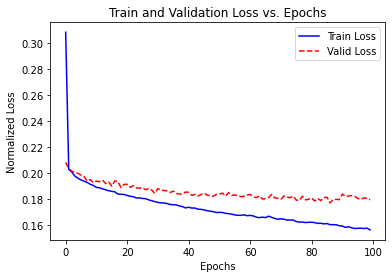

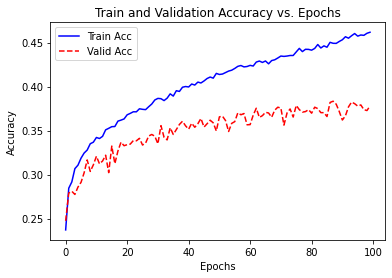

In [4]:
print(f'Test set accuracy : {test_accuracy:.4f}')
num_epochs = [i for i in range(config_c['epochs'])]

plot_name = 'std'

plt.plot(num_epochs, train_loss_record, '-b', label='Train Loss')
plt.plot(num_epochs, holdout_loss_record, '--r', label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Normalized Loss')
plt.title("Train and Validation Loss vs. Epochs")
plt.legend()
plt.savefig(f'plots/(c)_{plot_name}_loss.png')
plt.show()


plt.plot(num_epochs, train_accuracy_record, '-b', label='Train Acc')
plt.plot(num_epochs, holdout_accuracy_record, '--r', label='Valid Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy vs. Epochs")
plt.legend()
plt.savefig(f'plots/(c)_{plot_name}_acc.png')
plt.show()